In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/housing_price_dataset.csv (1).zip")

In [ ]:
data.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
df = data.copy()

# Initial Observations

In [ ]:
df.shape

(50000, 6)

In [ ]:
# We have 5 features 1 class
# We Select Price as our class
# As the values in the price column is quantitive, this is a regression problem

In [ ]:
corr = df.drop("Neighborhood",axis = 1).corr()

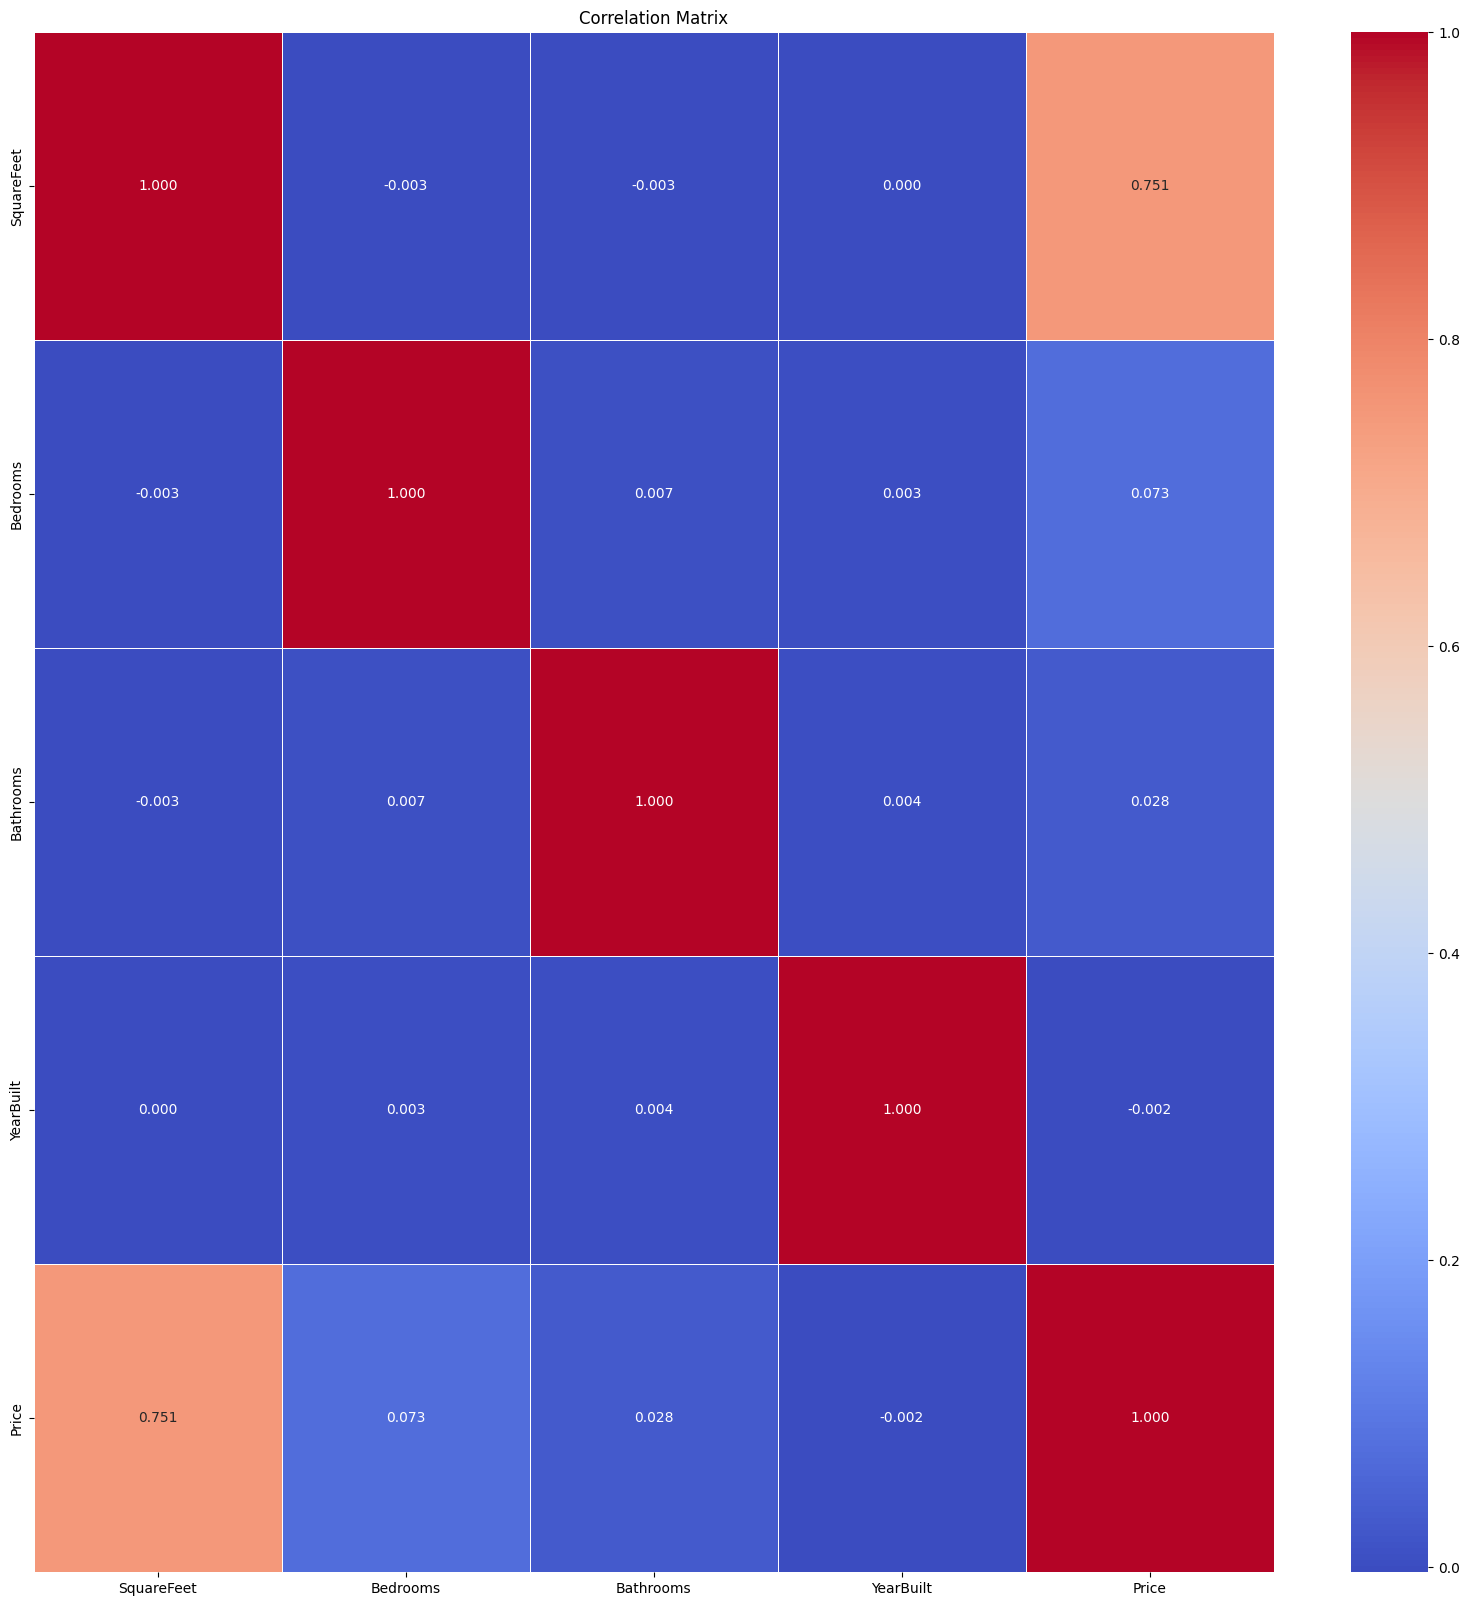

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Squarefeet has a very good correlation with Price

# Data Preprocessing

## Null and Duplicate value handling

In [ ]:
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [ ]:
# No null values present in the dataset

In [ ]:
df.duplicated().sum()

0

In [ ]:
# No duplicate value in the dataset

## Encoding

In [ ]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [ ]:
df.nunique()

SquareFeet       2000
Bedrooms            4
Bathrooms           3
Neighborhood        3
YearBuilt          72
Price           50000
dtype: int64

In [ ]:
# We can encode the Neighborhood column

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df["Neighborhood"] = encoder.fit_transform(df[["Neighborhood"]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


In [ ]:
# Separating class and features
X = df.drop("Price",axis = 1)
y = df["Price"]

## Scaling

In [ ]:
X.nunique()

SquareFeet      2000
Bedrooms           4
Bathrooms          3
Neighborhood       3
YearBuilt         72
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
for col_name in X.columns:
    if X[col_name].nunique() > 3:
        X[col_name] = scaler.fit_transform(X[[col_name]])

In [ ]:
X.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,0.563282,0.666667,1,0,0.267606
1,0.729865,0.333333,2,0,0.422535
2,0.430215,0.000000,1,1,0.281690
3,0.647324,0.000000,1,2,0.647887
4,0.565283,1.000000,2,1,0.718310


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Model Selection & Training

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as mt

In [ ]:
# Initialize all the models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
svr_model = SVR()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()
knn_model = KNeighborsRegressor()
mlp_model = MLPRegressor()
elastic_net_model = ElasticNet()

# Store the models in a list
models = [linear_model, ridge_model, lasso_model, svr_model, decision_tree_model,
         random_forest_model, gradient_boosting_model, knn_model, mlp_model, elastic_net_model]


In [ ]:
def evaluate_performance(y_true,y_pred):
    # Assuming y_true and y_pred are actual and predicted values
    mae = mt.mean_absolute_error(y_true, y_pred)
    mse = mt.mean_squared_error(y_true, y_pred)
    rmse = mt.mean_squared_error(y_true, y_pred, squared=False)
    r2 = mt.r2_score(y_true, y_pred)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")


In [ ]:
def train_and_test_regression_models(models,X_train,y_train,X_test,y_test):
    for model in models:
        model.fit(X_train, y_train)
        print("Train Score:")
        predicted_y_train = model.predict(X_train)
        print(f"{model}")
        evaluate_performance(y_train,predicted_y_train)
        print("------------------------------")
        print("Test Score:")
        predicted_y_test = model.predict(X_test)
        print(f"{model}")
        evaluate_performance(y_test,predicted_y_test)
        print("------------------------------")
        print("------------------------------")

In [ ]:
train_and_test_regression_models(models,X_train,y_train,X_test,y_test)

Train Score:
LinearRegression()
MAE: 39970.36708444739
MSE: 2502252469.2931614
RMSE: 50022.51962159805
R-squared: 0.5689591598552597
------------------------------
Test Score:
LinearRegression()
MAE: 39741.647169393065
MSE: 2468771544.275626
RMSE: 49686.73408743652
R-squared: 0.5728435816568727
------------------------------
------------------------------
Train Score:
Ridge()
MAE: 39970.48663430456
MSE: 2502252861.265455
RMSE: 50022.523539556205
R-squared: 0.568959092333669
------------------------------
Test Score:
Ridge()
MAE: 39741.47560559037
MSE: 2468762797.852934
RMSE: 49686.646071685434
R-squared: 0.5728450949968167
------------------------------
------------------------------
Train Score:
Lasso()
MAE: 39970.38492272316
MSE: 2502252503.2929106
RMSE: 50022.51996144247
R-squared: 0.5689591539984243
------------------------------
Test Score:
Lasso()
MAE: 39741.62321458877
MSE: 2468769539.772183
RMSE: 49686.71391601766
R-squared: 0.5728439284838253
------------------------------
---

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Analysis and Summary

## Linear Regression, Ridge, Lasso

- **Insight:** These models exhibit similar performance on both training and testing datasets.
- **R-squared (coefficient of determination):** Approximately 57%, indicating that 57% of the variance in the target variable is explained.
- **MAE and RMSE:** Provide insights into the average prediction error.

## Support Vector Regression (SVR)

- **Insight:** SVR shows poor performance on both training and testing datasets.
- **R-squared close to 0:** Indicates that the model does not fit the data well.
- **Higher MAE and RMSE** Suggest a larger prediction error.

## Decision Tree Regressor

- **Insight:** The model performs exceptionally well on the training set (R-squared close to 1).
- **Overfitting Alert:** On the testing set, the performance drops significantly, indicating potential overfitting.

## Random Forest Regressor

- **Insight:** Random Forest performs well on both training and testing datasets.
- **High R-squared on testing:** Indicates good generalization.
- **Lower MAE and RMSE** Compared to linear models, suggesting improved accuracy.

## Gradient Boosting Regressor

- **Insight:** Similar performance to linear models, but with a slightly higher R-squared on testing.
- **Moderate MAE and RMSE ** Values.

## K-Nearest Neighbors (KNN) Regressor

- **Insight:** KNN performs reasonably well on both training and testing sets.
- **Higher R-squared:** Compared to linear models, suggesting a better fit.
- **Moderate MAE and RMSE** Values.

## MLP Regressor (Neural Network)

- **Insight:** The neural network model exhibits poor performance with low R-squared on both sets.
- **Higher MAE and RMSE** Values indicate a larger prediction error.

## ElasticNet

- **Insight:** Similar performance to linear models.
- **Moderate R-squared** and prediction errors.

**Key Takeaways:**
- **Random Forest:** Appears to be a strong performer with good generalization to the testing set.
- **Linear models** and **KNN** Provide reasonable results.
- **Decision Tree and MLP** Models show signs of potential overfitting or poor generalization.

# Recommendations for future work
- **Hyperparameter Tuning:** Optimize hyperparameters for models that exhibit potential overfitting.
- **Feature Engineering:** Explore feature engineering to improve model performance.
- **Ensemble Methods:** Consider ensemble methods to combine models for better overall performance.

